In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
from math import exp, sqrt, log
from scipy.stats import norm
import numpy as np

### 1st Strategy ( buy-and-hold)

In [2]:
path_to_date = 'C:\\Users\\Vlada\\Downloads\\data_set\\strategy2.xlsx'
df = pd.read_excel(path_to_date)

In [3]:
df['shift_priceETH'] = df['priceETH'].shift(periods=1)
df['pnl'] = (df['priceETH'] - df['shift_priceETH'])
# df

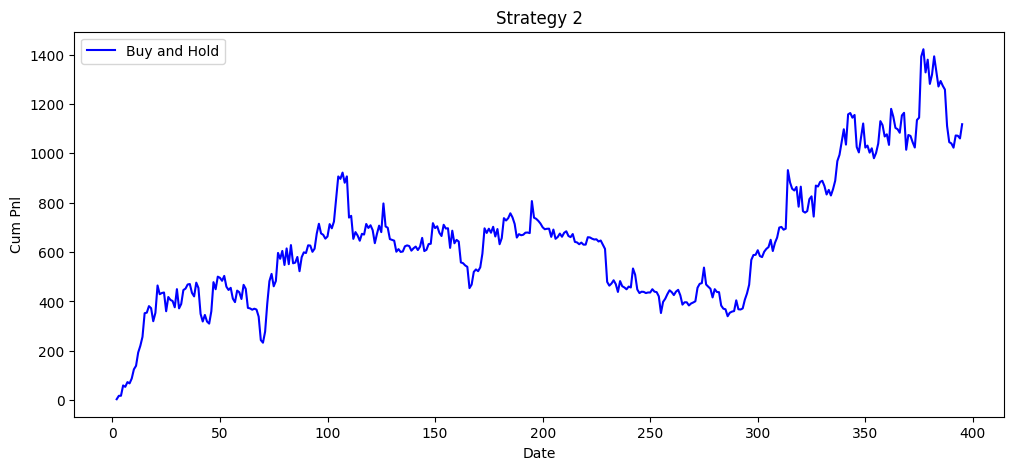

In [4]:
plt.figure(figsize=(12, 5))

plt.plot(df['Day'], df['pnl'].cumsum(), color='blue', label='Buy and Hold')

plt.title('Strategy 2')
plt.xlabel('Date')
plt.ylabel('Cum Pnl')

plt.legend()

plt.show()

### Strategy 2 (Liquidity Pool)

In [5]:
x = 0.5 
y = 598
k = x * y
# k

In [6]:
S_0 = df['priceETH'][0] 
# S_0

In [7]:
x_dif = list((df['priceETH'] - df['shift_priceETH'])*0.5)[1:]
x_price = list(df['priceETH']*0.5)[:394]

In [8]:
# веса ETH
x_V = [0.5] 
for i in range(len(x_price)):  
    x_V.append(x + x_dif[i]/x_price[i])
# x_V

# веса USTD
y_V = []
for i in range(len(x_V)):
    y_V.append((1 - x_V[i]) * S_0)
# y_V

In [9]:
S = list(df['priceETH'])[1:]
# S[0]
# len(S)

In [10]:
# Расчитываем портфель
P =[1196.61306480845]
for i in range(len(S)):
    P.append(x_V[i] * S[i] + y_V[i])   
# P

In [11]:
# Доходность портфеля
P_i = []
for i in range(1, len(P)):
    P_i.append(P[i] - P[i-1])
# pnl2
# len(pnl2)

In [12]:
# P
# fees

In [13]:
# Расчет Fees
f = (0.05 * df['vol']/df['tvl'])[:394]

profits = []
for i in range(len(f)):
    profits.append((f[i] * P_i[i] + P_i[i]))

# profits

In [14]:
dff = pd.DataFrame()
dff['pnl2'] = P_i
dff['Day'] = list(df['Day'][1:])
dff['fees'] = f
dff['profit'] = profits
dff

,pnl2,Day,fees,profit
0,2.023076,2,0.028421,2.080575
1,6.919937,3,0.020993,7.065207
2,0.338312,4,0.048702,0.354789
3,20.649264,5,0.030139,21.271622
4,-0.982233,6,0.041289,-1.022788
...,...,...,...,...
389,18.651867,391,0.035689,19.317532
390,18.793096,392,0.020154,19.171854
391,31.501372,393,0.021300,32.172339
392,-29.650190,394,0.035224,-30.694600


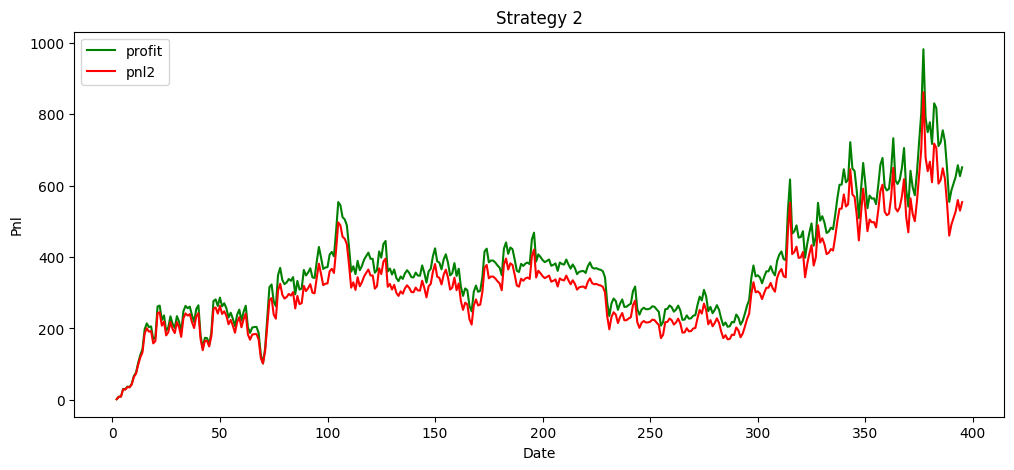

In [15]:
plt.figure(figsize=(12, 5))

plt.plot( dff['Day'], dff['profit'].cumsum() , color='green', label='profit')
plt.plot( dff['Day'], dff['pnl2'].cumsum() , color='red', label='pnl2')

plt.title('Strategy 2')
plt.xlabel('Date')
plt.ylabel('Pnl')

plt.legend()

plt.show()

### Strategy 3 (Options)

In [5]:
T = 30/365 
k = 2400
sigma = 0.4
# t = 1 / 30
S_i = 2700

strike = 2400
sigma = 0.4
t = 30/365
s = 2700

d1 = (np.log(S_i / k) + (0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

C_t = S_i  * norm.cdf(d1, 0, 1)  - k * norm.cdf(d2,  0, 1)  
print(C_t)

323.0680587780637


In [10]:
norm.cdf(-10)

7.61985302416047e-24

In [16]:
strike_prices = [2497, 2616, 2735]
sigma = 0.4 #volatility
t = 1/397
S = list(df['priceETH'])
dic = {}

for k in strike_prices:
    if k not in dic: dic[k]=[]
    T = 1 
    for S_i in S:
        
        T -= t

        d1 = (np.log(S_i / k) + (0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)

        C_t = S_i  * norm.cdf(d1, 0, 1)  - k * norm.cdf(d2,  0, 1)  
        dic[k].append(C_t)


In [17]:
df

,date,dailyRevenue,dailyFees,vol,Day,priceETH,tvl,shift_priceETH,pnl
0,2023-01-02,3.437005e+06,7.210722e+06,4.797460e+08,1,1196.613065,8.439876e+08,NaN,NaN
1,2023-01-03,3.743717e+06,7.728053e+06,3.538714e+08,2,1200.659217,8.428316e+08,1196.613065,4.046152
2,2023-01-04,4.206103e+06,9.218644e+06,8.544486e+08,3,1214.378946,8.772231e+08,1200.659217,13.719729
3,2023-01-05,4.531696e+06,1.054030e+07,5.313850e+08,4,1214.760969,8.815427e+08,1214.378946,0.382023
4,2023-01-06,4.589394e+06,9.704728e+06,7.195531e+08,5,1256.436604,8.713671e+08,1214.760969,41.675634
...,...,...,...,...,...,...,...,...,...
390,2024-01-27,8.117631e+06,1.800876e+07,5.183378e+08,391,2219.614527,1.285935e+09,2236.739313,-17.124786
391,2024-01-28,6.741164e+06,1.666293e+07,5.589906e+08,392,2268.870732,1.312209e+09,2219.614527,49.256204
392,2024-01-29,6.932095e+06,1.724563e+07,9.158629e+08,393,2267.907852,1.300042e+09,2268.870732,-0.962880
393,2024-01-30,8.176882e+06,2.098550e+07,9.551630e+08,394,2257.054465,1.336150e+09,2267.907852,-10.853387


In [43]:
options = pd.DataFrame()
options['option_1'] = dic[2497]
options['shift_option_1'] = options['option_1'].shift(periods=1)
options['pnl_1'] = -(options['option_1'] - options['shift_option_1']) + (df['priceETH'] - df['shift_priceETH'])

options['option_2'] = dic[2616]
options['shift_option_2'] = options['option_2'].shift(periods=1)
options['pnl_2'] = -(options['option_2'] - options['shift_option_2']) + (df['priceETH'] - df['shift_priceETH'])

options['option_3'] = dic[2735]
options['shift_option_3'] = options['option_3'].shift(periods=1)
options['pnl_3'] = -(options['option_3'] - options['shift_option_3']) + (df['priceETH'] - df['shift_priceETH'])
# options

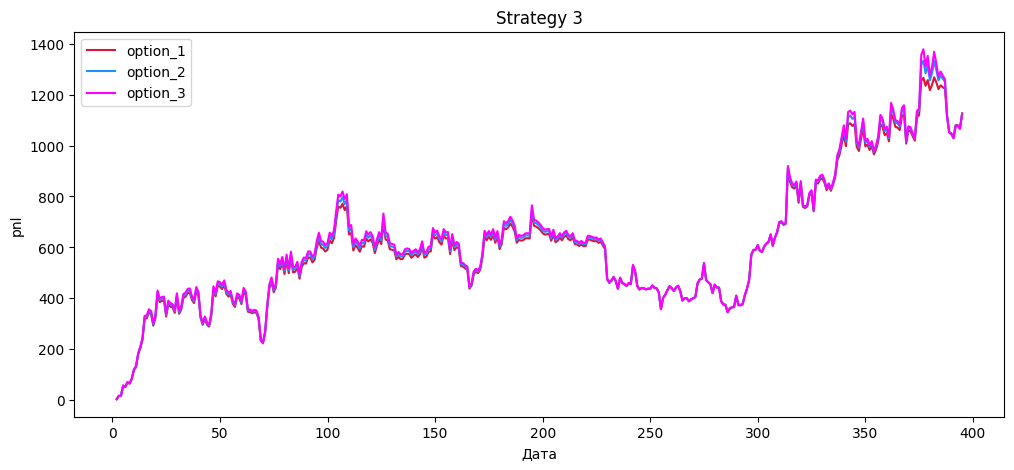

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(df['Day'], options['pnl_1'].cumsum(), color='crimson', label='option_1')
plt.plot(df['Day'], options['pnl_2'].cumsum(), color='dodgerblue', label='option_2')
plt.plot(df['Day'], options['pnl_3'].cumsum(), color='fuchsia', label='option_3')

plt.title('Strategy 3')
plt.xlabel('Дата')
plt.ylabel('pnl')

plt.legend()

plt.show()

### ALl Stratagies

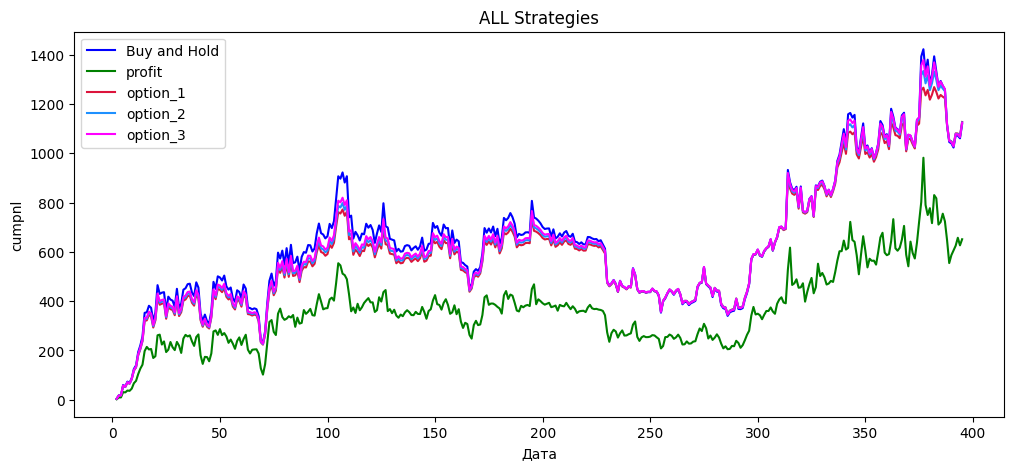

In [45]:
plt.figure(figsize=(12, 5))
#strategy_1
plt.plot(df['Day'], df['pnl'].cumsum(), color='blue', label='Buy and Hold')

#strategy_2
plt.plot( dff['Day'], dff['profit'].cumsum() , color='green', label='profit')

# #strategy_3
plt.plot(df['Day'], options['pnl_1'].cumsum(), color='crimson', label='option_1')
plt.plot(df['Day'], options['pnl_2'].cumsum(), color='dodgerblue', label='option_2')
plt.plot(df['Day'], options['pnl_3'].cumsum(), color='fuchsia', label='option_3')

plt.title('ALL Strategies')
plt.xlabel('Дата')
plt.ylabel('cumpnl')

plt.legend()

plt.show()